In [47]:
import jax
import jax.numpy as jnp
from jax.random import split
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import pickle


In [75]:
with open("../data/cleanrl_data.pkl", "rb") as f:
    data = pickle.load(f)
def get_data(env_id):
    a = [key for key in data.keys() if env_id in key]
    assert len(a) == 1
    a = a[0]
    return data[a]


In [10]:
from compile_experiment import envs_atari_57, envs_procgen

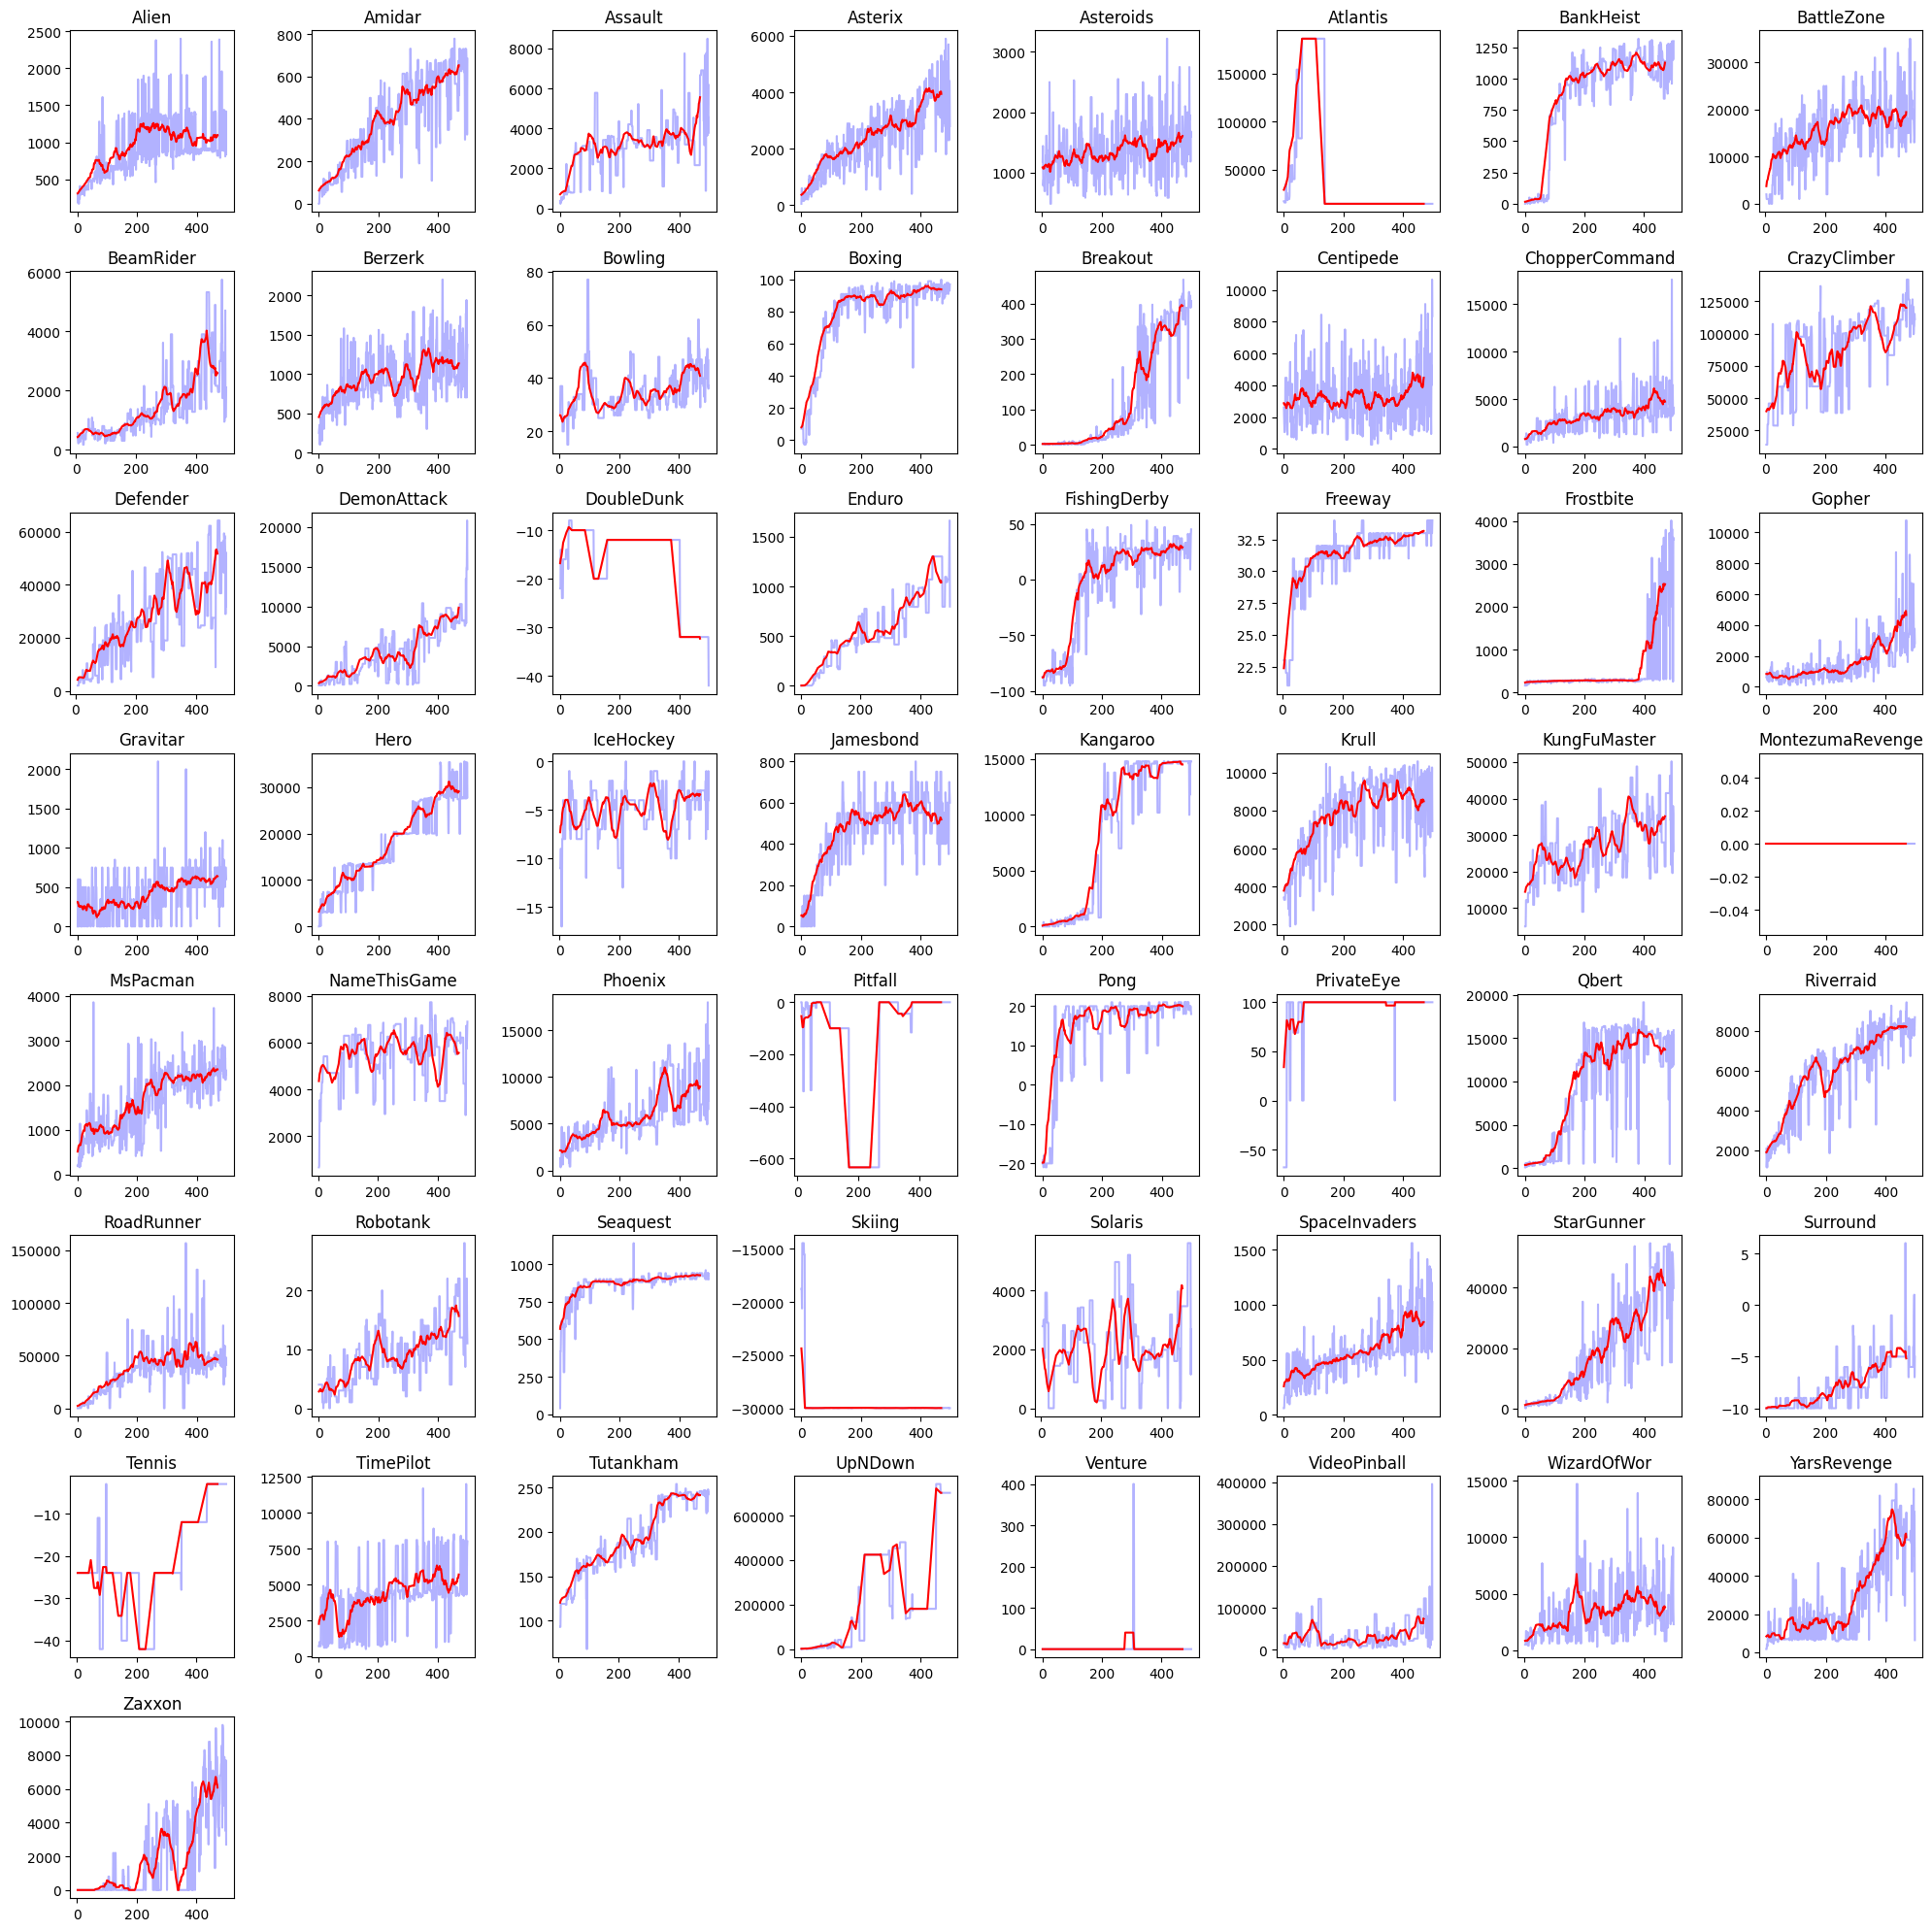

In [77]:
plt.figure(figsize=(20, 20))
for i, env_id in enumerate(envs_atari_57):
    plt.subplot(8, 8, i+1)
    
    a = get_data(env_id)['charts/episodic_return']
    a = pd.Series(a).fillna(method='ffill').to_numpy()
    plt.plot(a, c='b', alpha=0.3)
    a = np.convolve(a, np.ones(30)/30, mode='valid')
    plt.plot(a, c='r', alpha=1.0)
    plt.title(env_id)

    
plt.tight_layout()
plt.show()

In [68]:
a = ["CoinRun 5 10 5 10",
     "StarPilot 1.5 35 2.5 64",
     "CaveFlyer 2 13.4 3.5 12",
     "Dodgeball 1.5 19 1.5 19",
     "FruitBot -.5 27.2 -1.5 32.4",
     "Chaser .5 14.2 .5 13",
     "Miner 1.5 20 1.5 13",
     "Jumper 1 10 3 10",
     "Leaper 1.5 10 3 10",
     "Maze 4 10 5 10",
     "BigFish 0 40 1 40",
     "Heist 2 10 3.5 10",
     "Climber 1 12.6 2 12.6",
     "Plunder 3 30 4.5 30",
     "Ninja 2 10 3.5 10",
     "BossFight .5 13 .5 13",]


bounds = {}
for ai in a:
    ai = ai.split()
    env_id = ai[0].lower()
    bounds[env_id] = (float(ai[3]), float(ai[4]))


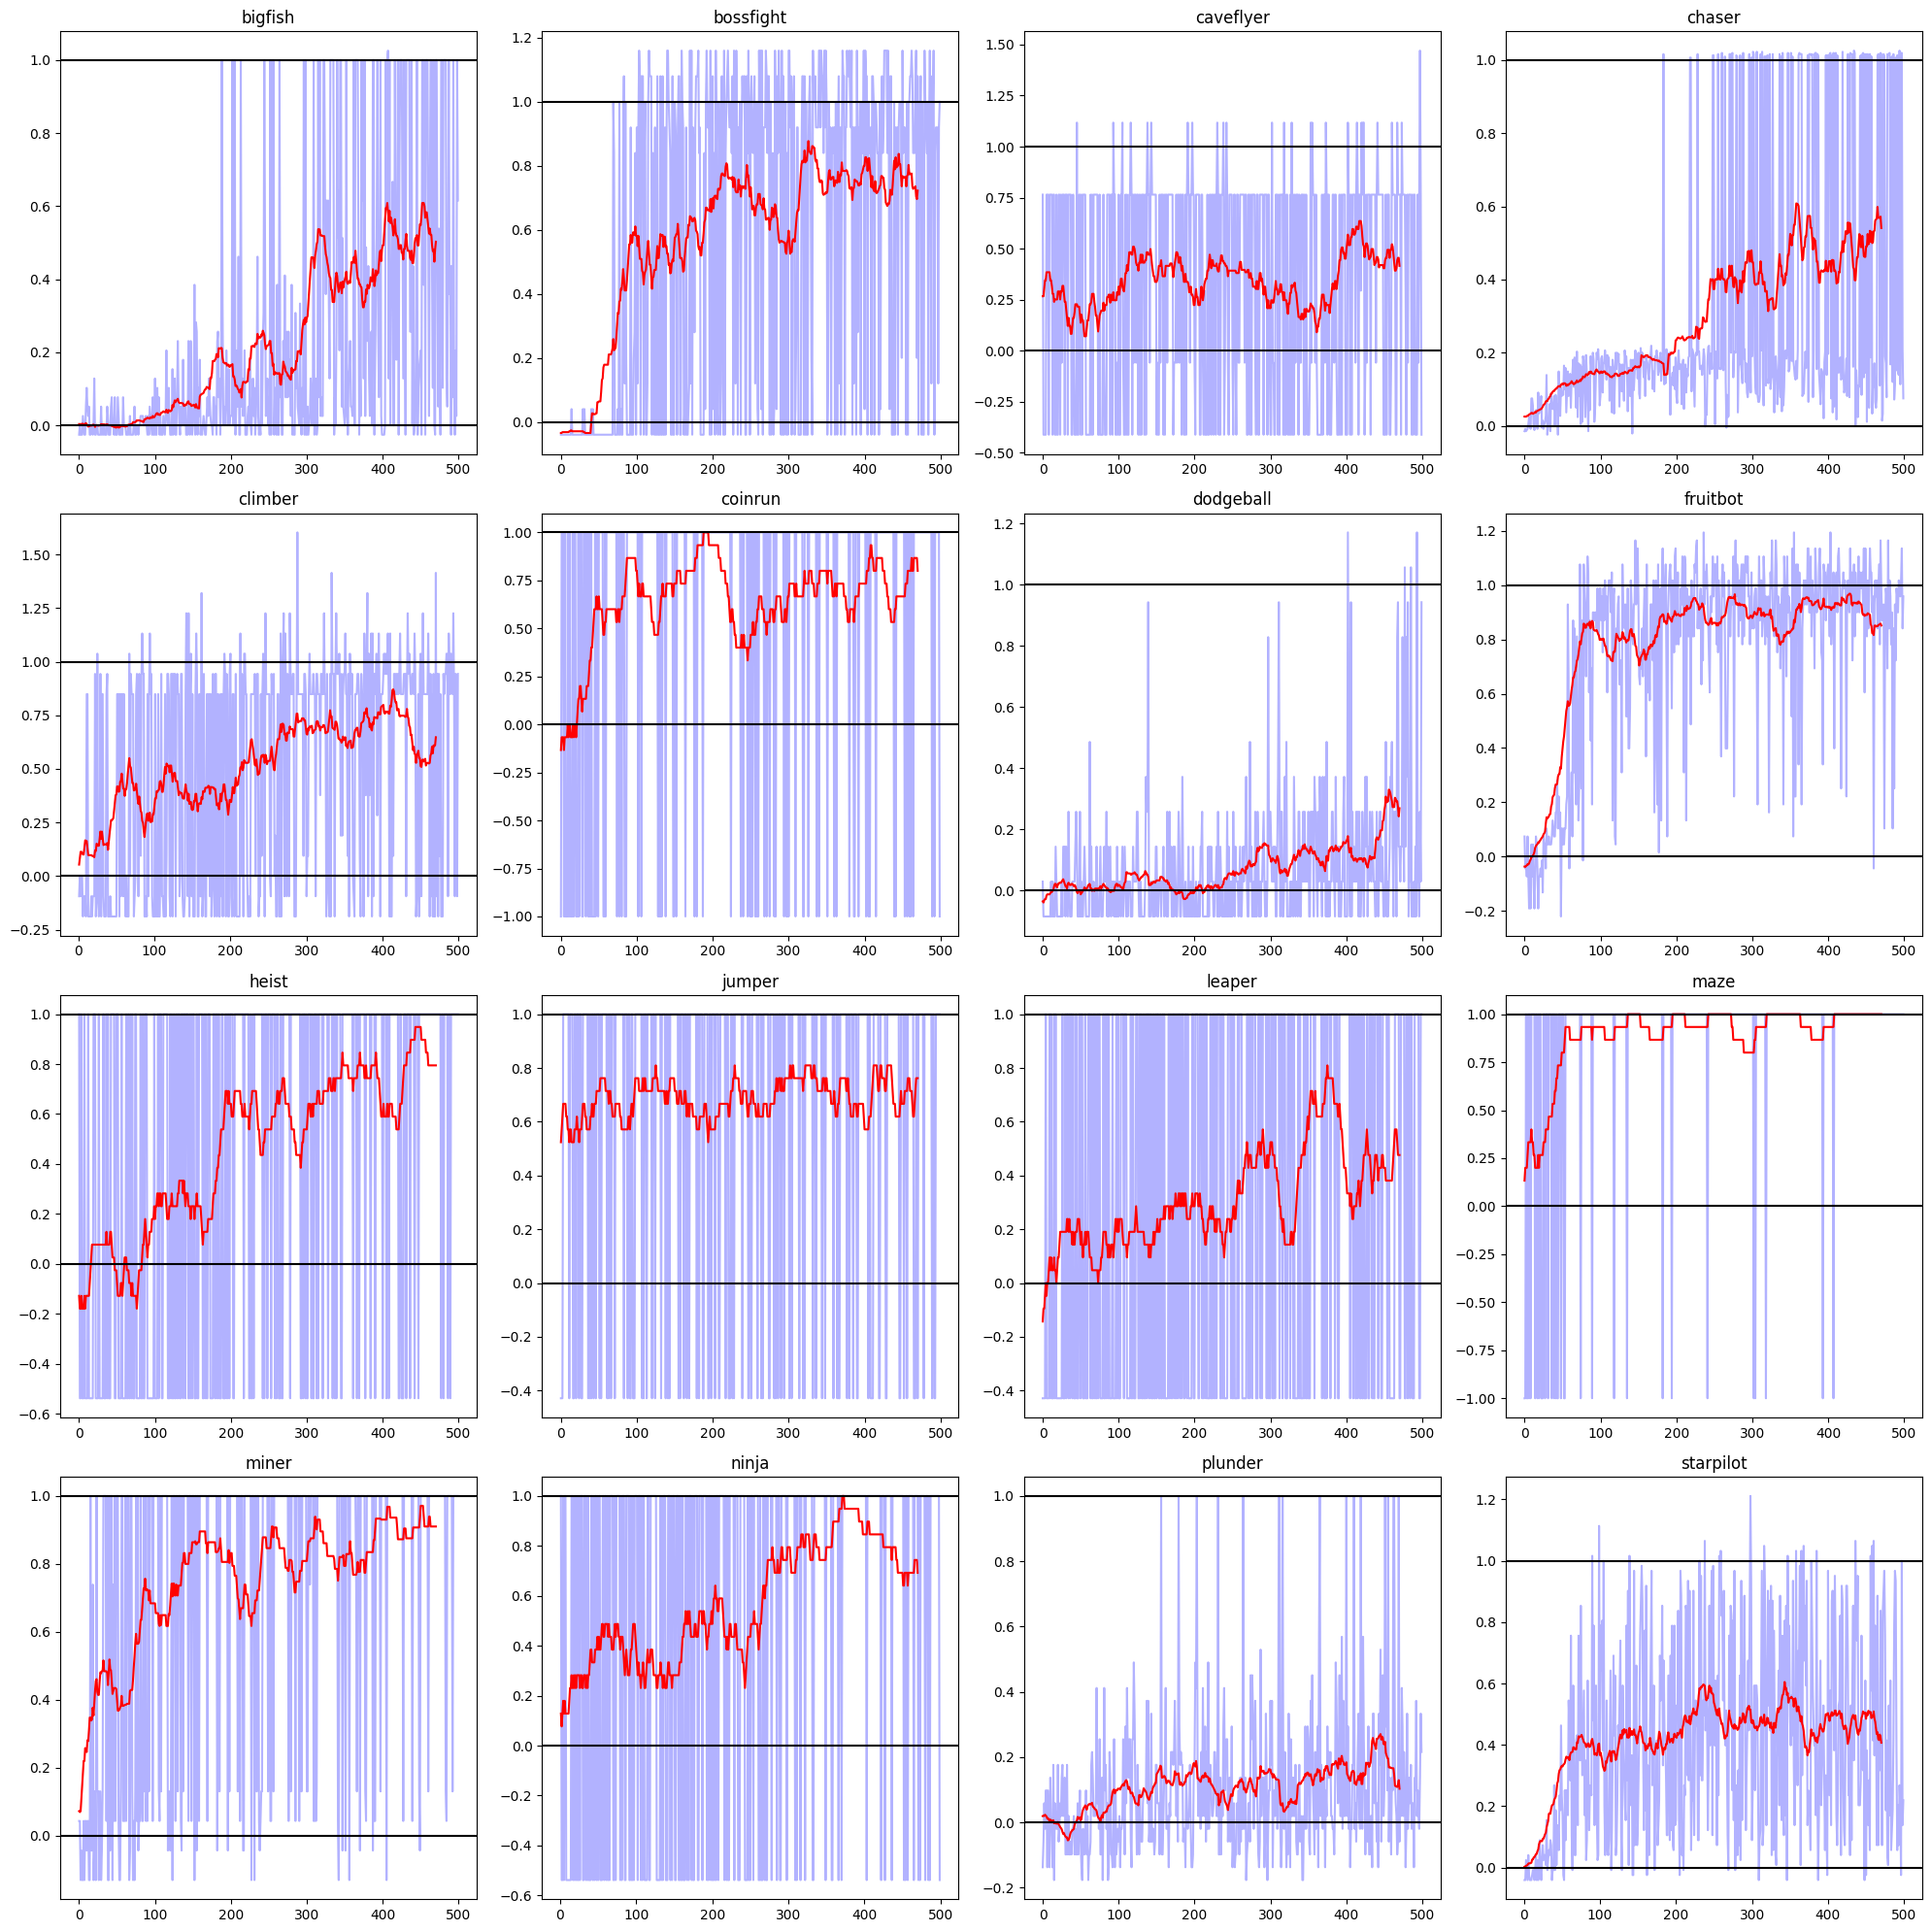

In [71]:

plt.figure(figsize=(20, 20))
for i, env_id in enumerate(envs_procgen):
    plt.subplot(4, 4, i+1)
    a = get_data(env_id)['charts/episodic_return']
    # fill nan with previous non nan value
    a = pd.Series(a).fillna(method='ffill').to_numpy()
    low, high = bounds[env_id]
    a = (a - low) / (high - low)
    plt.plot(a, c='b', alpha=0.3)
    a = np.convolve(a, np.ones(30)/30, mode='valid')
    plt.plot(a, c='r', alpha=1.0)
    plt.axhline(0., c='black')
    plt.axhline(1., c='black')
    plt.title(env_id)
plt.tight_layout()
plt.show()
